<a href="https://colab.research.google.com/github/gautumsvp7/SolarDataSetPublic/blob/main/Solar_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving solar-energy-production-sites-1.csv to solar-energy-production-sites-1.csv


In [52]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  


from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [53]:
df = pd.read_csv(io.BytesIO(uploaded['solar-energy-production-sites-1.csv'])) 
print(df)

                          Facility Name  ...                                 Address / Location
0    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
1    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
2    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
3    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
4    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
..                                  ...  ...                                                ...
377                    Ed Fountain Park  ...  1400 N Decatur Blvd\nLas Vegas, NV 89108\n(36....
378    Durango Hills Community Center S  ...  3521 N Durango Dr\nLas Vegas, NV 89129\n(36.22...
379                     Fire Station 44  ...  7701 W Washington Ave\nLas Vegas, NV 89128\n(3...
380               Centennial Hills Park 

In [54]:
df.describe()

,KW Rating,KWH Generated,Generated
count,382.000000,3.820000e+02,382.000000
mean,195.302618,3.724244e+05,32259.801047
std,658.166173,1.338346e+06,119224.015824
min,15.300000,2.745200e+04,1136.000000
25%,30.100000,4.942500e+04,4245.750000
50%,44.500000,7.208900e+04,6697.000000
75%,100.000000,1.468800e+05,11163.000000
max,3334.000000,6.759539e+06,805458.000000


In [55]:
print(df.groupby('Facility Name').size())

Facility Name
All American Park                           9
Centennial Hills Community Center N & S     9
Centennial Hills Park                      11
Durango Hills Community Center S           10
East Las Vegas Community Center            13
East Yard - Fire Equipment Center           9
East Yard - Main Gate 1                    17
East Yard - Sign Shop                      17
Ed Fountain Park                            9
Fire Station 10                            13
Fire Station 106                            8
Fire Station 107                            9
Fire Station 41                            13
Fire Station 43                            14
Fire Station 44                            13
Fire Station 45                            13
Fire Station 48                            13
Fire Station 5                             13
Fire Station 6                             13
Fire Station 7                             13
Fire Station 8                             13
Lorenzi Park        

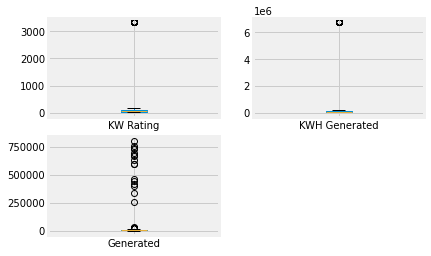

In [56]:
#Data Visualiztion
df.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey =False)
plt.show()

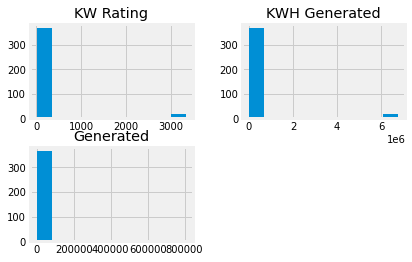

In [57]:
df.hist()
plt.show()

In [58]:
copy_df = df
f_names =set(copy_df['Facility Name'])


In [59]:
for col in copy_df.columns:
  print(col)

Facility Name
KW Rating
KWH Generated
Date
Generated
Address / Location


In [60]:
trimmed_df=copy_df.drop(['Date','Address / Location'],axis=1)

In [61]:
trimmed_df

,Facility Name,KW Rating,KWH Generated,Generated
0,Veterans Memorial Community Center,116.2,218498,22603
1,Veterans Memorial Community Center,116.2,218498,23330
2,Veterans Memorial Community Center,116.2,218498,17678
3,Veterans Memorial Community Center,116.2,218498,14427
4,Veterans Memorial Community Center,116.2,218498,10828
...,...,...,...,...
377,Ed Fountain Park,144.5,151050,20100
378,Durango Hills Community Center S,33.6,45246,2832
379,Fire Station 44,30.0,57914,6012
380,Centennial Hills Park,30.1,38876,4998


In [62]:
#creating dictionary to replace the names for easier analysis
list_loc = list(f_names)
d_loc = {}
ni = 0
for i in list_loc:
  d_loc[i] = ni
  ni += 1
print(d_loc)
#print(f_names)

{'Ed Fountain Park': 0, 'WPCF Plant': 1, 'Stupak Community Center': 2, 'Fire Station 48': 3, 'Centennial Hills Park': 4, 'Fire Station 41': 5, 'West Yard - Vehicle Services': 6, 'East Las Vegas Community Center': 7, 'Fire Station 43': 8, 'Fire Station 44': 9, 'Fire Station 5': 10, 'Veterans Memorial Community Center': 11, 'Fire Station 6': 12, 'All American Park': 13, 'East Yard - Sign Shop': 14, 'Fire Station 8': 15, 'Natural History Museum': 16, 'East Yard - Fire Equipment Center': 17, 'Mirabelli Community Center': 18, 'West Yard - EOC': 19, 'Lorenzi Park': 20, 'Fire Station 107': 21, 'Centennial Hills Community Center N & S': 22, 'Durango Hills Community Center S': 23, 'Fire Station 45': 24, 'Fire Station 10': 25, 'West Yard - Operations-Maintenance': 26, 'Rainbow Park': 27, 'Fire Station 106': 28, 'East Yard - Main Gate 1': 29, 'Fire Station 7': 30}


In [63]:
len(d_loc.keys())

31

In [64]:
test_df = trimmed_df

In [65]:
nest_d = {'Facility Name':d_loc}
print(nest_d)

{'Facility Name': {'Ed Fountain Park': 0, 'WPCF Plant': 1, 'Stupak Community Center': 2, 'Fire Station 48': 3, 'Centennial Hills Park': 4, 'Fire Station 41': 5, 'West Yard - Vehicle Services': 6, 'East Las Vegas Community Center': 7, 'Fire Station 43': 8, 'Fire Station 44': 9, 'Fire Station 5': 10, 'Veterans Memorial Community Center': 11, 'Fire Station 6': 12, 'All American Park': 13, 'East Yard - Sign Shop': 14, 'Fire Station 8': 15, 'Natural History Museum': 16, 'East Yard - Fire Equipment Center': 17, 'Mirabelli Community Center': 18, 'West Yard - EOC': 19, 'Lorenzi Park': 20, 'Fire Station 107': 21, 'Centennial Hills Community Center N & S': 22, 'Durango Hills Community Center S': 23, 'Fire Station 45': 24, 'Fire Station 10': 25, 'West Yard - Operations-Maintenance': 26, 'Rainbow Park': 27, 'Fire Station 106': 28, 'East Yard - Main Gate 1': 29, 'Fire Station 7': 30}}


In [66]:
final_df = test_df.replace(to_replace = nest_d, value= None)

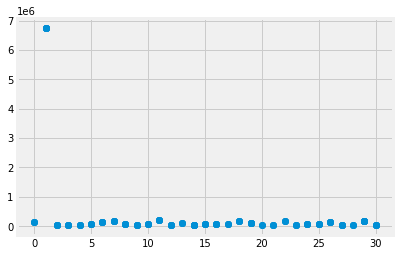

In [67]:
x1 = final_df['Facility Name']
x2 = final_df['KWH Generated']
plt.scatter(x1,x2)
plt.show()

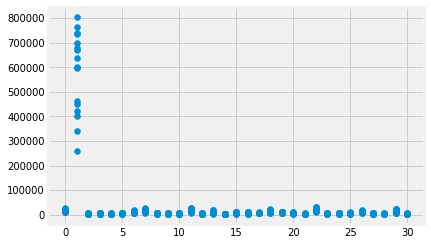

In [68]:
x1 = final_df['Facility Name']
x2 = final_df['Generated']
plt.scatter(x1,x2)
plt.show()


final_df should be used from this point onwards.
Facitlity name is the dependent variable.

# Training a model

In [69]:

array = final_df.values
print(array)


[[1.10000e+01 1.16200e+02 2.18498e+05 2.26030e+04]
 [1.10000e+01 1.16200e+02 2.18498e+05 2.33300e+04]
 [1.10000e+01 1.16200e+02 2.18498e+05 1.76780e+04]
 ...
 [9.00000e+00 3.00000e+01 5.79140e+04 6.01200e+03]
 [4.00000e+00 3.01000e+01 3.88760e+04 4.99800e+03]
 [2.60000e+01 7.93000e+01 1.46880e+05 1.09600e+04]]


In [70]:
final_df.shape

(382, 4)

To find the optimal numbers of clusters for applying K means, we are applying 'Elbow method'

In [71]:
X = final_df


In [93]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 



In [94]:

for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 


1 : 537112.7601020628
2 : 52534.973558122285
3 : 25268.33809411425
4 : 21728.46614821547
5 : 16916.945630956383
6 : 12313.345053991892
7 : 11632.267567080899
8 : 11119.107108709131
9 : 9445.569004627741


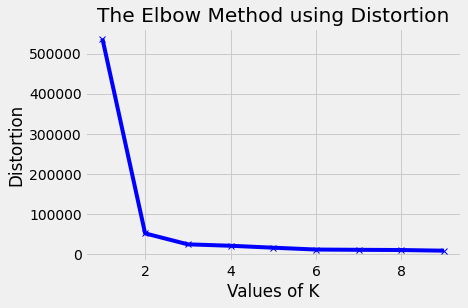

In [95]:

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 


The value of K should be 2, as evident from the above graph

In [96]:
kmean = KMeans(n_clusters = 2,n_init=10,max_iter=300)
kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [97]:
y_predicted = kmean.fit_predict(X[['KW Rating','KWH Generated','Generated']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [98]:
X['cluster'] = y_predicted
X.head()

,Facility Name,KW Rating,KWH Generated,Generated,cluster
0,11,116.2,218498,22603,0
1,11,116.2,218498,23330,0
2,11,116.2,218498,17678,0
3,11,116.2,218498,14427,0
4,11,116.2,218498,10828,0


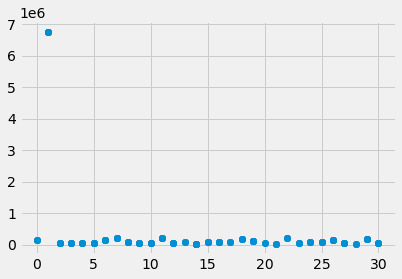

In [99]:
plt.scatter(X['Facility Name'],X['KWH Generated'])


In [100]:
kmean.inertia_

1607276910733.5645

In [101]:
kmean.cluster_centers_

array([[5.80918033e+01, 9.32062951e+04, 8.37138525e+03],
       [3.33400000e+03, 6.75953900e+06, 5.78707312e+05]])

In [102]:
kmean.n_iter_

2

In [103]:
set(X['cluster'])

{0, 1}

<Figure size 7200x7200 with 0 Axes>

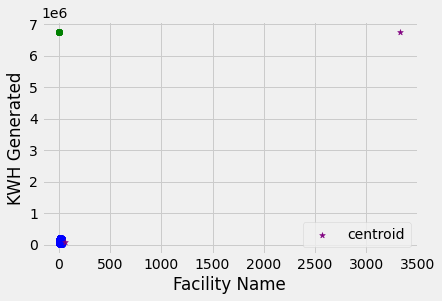

<Figure size 7200x7200 with 0 Axes>

In [112]:
df0 = X[X.cluster==0]
df1 = X[X.cluster==1]
df2 = X[X.cluster==2]
df3 = X[X.cluster==3]
df4 = X[X.cluster==4]
df5 = X[X.cluster==5]
df6 = X[X.cluster==6]
df7 = X[X.cluster==7]
df8 = X[X.cluster==8]

plt.scatter(df0['Facility Name'],df0['KWH Generated'],color='blue')
plt.scatter(df1['Facility Name'],df1['KWH Generated'],color='green')
plt.scatter(df2['Facility Name'],df2['KWH Generated'],color='red')
plt.scatter(df3['Facility Name'],df3['KWH Generated'],color='cyan')
plt.scatter(df4['Facility Name'],df4['KWH Generated'],color='magenta')
plt.scatter(df5['Facility Name'],df5['KWH Generated'],color='yellow')
plt.scatter(df6['Facility Name'],df6['KWH Generated'],color='black')
plt.scatter(df7['Facility Name'],df7['KWH Generated'],color='white')
plt.scatter(df8['Facility Name'],df8['KWH Generated'],color='0.75')

plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Facility Name')
plt.ylabel('KWH Generated')
plt.legend()
plt.figure(figsize=(100,100))

Cluster 1 Inertia 687852072983767.5
Cluster 2 Inertia 1607276938720.9087
Cluster 3 Inertia 627783396555.0989
Cluster 4 Inertia 284523705664.09485
Cluster 5 Inertia 185582728851.5218
Cluster 6 Inertia 126188272662.62991
Cluster 7 Inertia 95348343747.40839
Cluster 8 Inertia 71080578662.99042
Cluster 9 Inertia 55662633498.48543
Cluster 10 Inertia 46412824051.85954
Cluster 11 Inertia 38202473830.67639
Cluster 12 Inertia 29061536383.518436
Cluster 13 Inertia 22288362155.14557
Cluster 14 Inertia 18938650905.14557
Cluster 15 Inertia 16639669953.221252
Cluster 16 Inertia 14222012375.564278
Cluster 17 Inertia 11779615203.897612
Cluster 18 Inertia 10499782967.258663
Cluster 19 Inertia 8932702062.49319


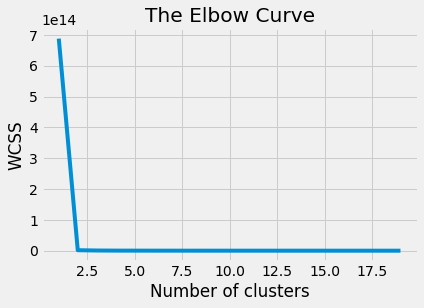

In [109]:
wcss = []
for i in range(1,20):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
 kmeans.fit(X)
 wcss.append(kmeans.inertia_)
 print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") ##WCSS stands for total within-cluster sum of square
plt.show()

## TRYING FROM :
https://realpython.com/k-means-clustering-python/

Elbow method:

In [85]:
kmeans_kwargs = {"init":"random","n_init":10,"max_iter":300,"random_state":42}
sse = []
for k in range(1,11):
  kmeans= KMeans(n_clusters = k,**kmeans_kwargs)
  kmeans.fit(final_df)
  sse.append(kmeans.inertia_)

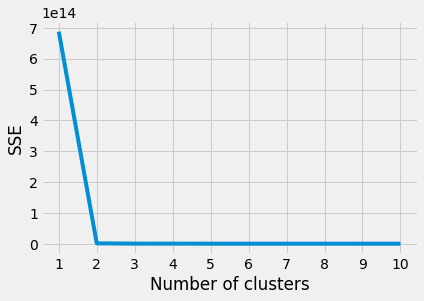

In [86]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()


Silhouette coefficient

In [87]:
from sklearn.metrics import silhouette_score

In [88]:
silhouette_coefficients = []
for k in range(2,10):
  kmean = KMeans(n_clusters=k,**kmeans_kwargs)
  kmeans.fit(final_df)
  score = silhouette_score(final_df,kmeans.labels_)
  silhouette_coefficients.append(score)


In [89]:
len(silhouette_coefficients)

8

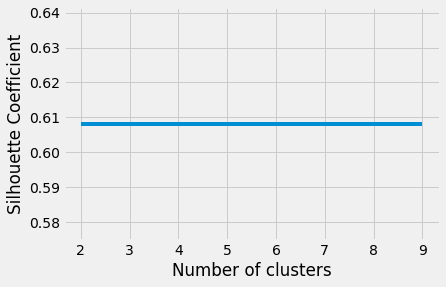

In [90]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,10),silhouette_coefficients)
plt.xticks(range(2,10))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Trying to visualize the groups